<a href="https://colab.research.google.com/github/Al-Amin20/ML-PROJECT-1/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETE-456  (Neural and Fuzzy systems in communications sessional)

## ID:1608020

##### **Lab-6:** Solving a real world problem using Neural network.

**Objective:**

1. To classify a real world problem(Diabetes) using Neural network.

## Procedure:


*  PANDAS, NUMPHY and Matplotlib.pyplot library are called.
*  Dataset are downloaded.
*  Dataset are read by using PANDAS library.
*  Missing values of the dataset are checked and replaced by mean values of entries of the column.
* Features values and target values are selected and separated.
* Fit transform was done for the train set.
* Train set and test set are selected.
* Then classification algorithm are applied for checking accuracy performance.
*Then the final results are provided.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#downloaded the dataset
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

In [ ]:
#Reading the dataset
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Cheking the null value is present or not
print(dataset[pd.isnull(dataset.Pregnancies)])
print(dataset[pd.isnull(dataset.Glucose)])
print(dataset[pd.isnull(dataset.BloodPressure)])
print(dataset[pd.isnull(dataset.SkinThickness)])
print(dataset[pd.isnull(dataset.Insulin)])
print(dataset[pd.isnull(dataset.BMI)])
print(dataset[pd.isnull(dataset.DiabetesPedigreeFunction)])
print(dataset[pd.isnull(dataset.Age)])
print(dataset[pd.isnull(dataset.Outcome)])

In [ ]:
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = dataset[['Outcome']] 

In [ ]:
#cheking the features.
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
#Checking the target value 
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
#splitting the dataset into train and test set
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [ ]:
#Normalized the data set for large sacle values
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Defining loss, optimizer and metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1)

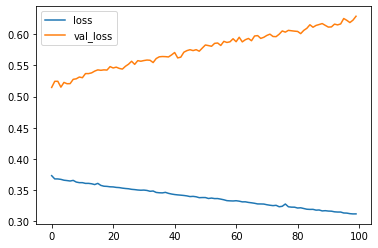

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

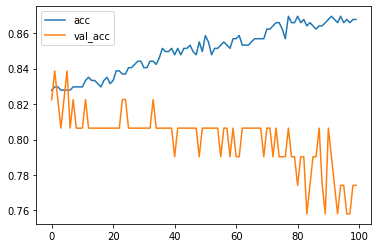

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154



### Final Results:


```
 precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

accuracy                           0.78       154

macro avg       0.74      0.75      0.74       154

weighted avg       0.78      0.78      0.78       154
```



### Conclussion:
For classify real world databse(Diabetes), a Neural Network are degisned.Missing  value are removed by using isnull for getting better performance.Large scale values are converted to standarized value for reducing complexity of model.No encoding are used because of missing string data. Accuracy for this degisned system are 78%.